# Tugas 2 Pengantar Kecerdasan Buatan - Fuzzy Logic
Nama : Reza Ahmad Yahya
NIM : 1301184403
Kelas : IF-42-12

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read File
filename = 'Mahasiswa - Mahasiswa.csv'
data = pd.read_csv(filename)
dataPenghasilan = data['Penghasilan']
dataPengeluaran = data['Pengeluaran']
dataID = data['Id']
data.head()

,Id,Penghasilan,Pengeluaran
0,1,18.76,9.68
1,2,8.35,4.52
2,3,17.03,10.11
3,4,8.23,9.25
4,5,16.89,6.99


In [3]:
# Prosedur Linguistik untuk bentuk fungsi trapesium
def trapesium(x,a,b,c,d):
    if x <= a or x >= d:
        return 0
    elif x > a and x < b:
        return (x-a)/(b-a)
    elif x >= b and x <= c:
        return 1
    elif x > c and x <= d:
        return -(x-d)/(d-c)

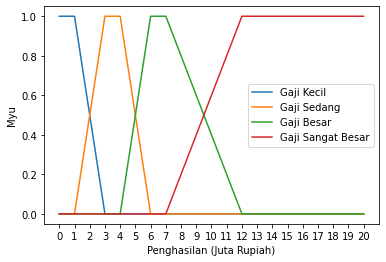

In [4]:
# Pengisian fuzzyset Penghasilan indeks 1: Kecil, indeks 2: Sedang, indeks 3: Besar, indeks 4: Sangat Besar
FuzzysetPenghasilan = []
for i in dataPenghasilan:
    temp1 = ["Kecil", (trapesium(i,-999,0,1.00,3.00))]
    temp2 = ["Sedang", (trapesium(i,1.00,3.00,4.00,6.00))]
    temp3 = ["Besar", (trapesium(i,4.00,6.00,7.00,12.00))]
    temp4 = ["Sangat Besar", (trapesium(i,7.00,12.00,20.00,999))]
    FuzzysetPenghasilan.append([temp1, temp2, temp3, temp4])    

# Gambar Fungsi Keanggotaan Trapesium : Penghasilan
x_kecil = [0, 1, 3, 20]
y_kecil = [1, 1, 0, 0]

x_sedang = [0, 1, 3, 4, 6, 20]
y_sedang = [0, 0, 1, 1, 0, 0]

x_besar = [0, 4, 6, 7, 12, 20]
y_besar = [0, 0, 1, 1, 0, 0]

x_sangatbesar = [0, 7, 12, 20]
y_sangatbesar = [0, 0, 1, 1]

xticks = [i for i in range(21)]
fig, ax = plt.subplots()
ax.plot(x_kecil, y_kecil, label='Gaji Kecil')
ax.plot(x_sedang, y_sedang, label='Gaji Sedang')
ax.plot(x_besar, y_besar, label='Gaji Besar')
ax.plot(x_sangatbesar, y_sangatbesar, label='Gaji Sangat Besar')
ax.set_xticks(xticks)
ax.set_xlabel('Penghasilan (Juta Rupiah)')
ax.set_ylabel('Myu')
ax.legend()
plt.show()

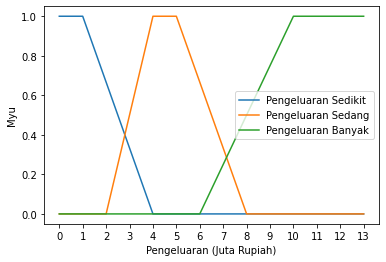

In [5]:
# Pengisian fuzzyset Pengeluaran indeks 1: Sedikit, indeks 2: Sedang, indeks 3: Banyak
FuzzysetPengeluaran = []
for i in dataPengeluaran:
    temp1 = ["Sedikit", (trapesium(i,-999,0,1.00,4.00))]
    temp2 = ["Sedang", (trapesium(i,2.00,4.00,5.00,8.00))]
    temp3 = ["Banyak", (trapesium(i,6.00,10.00,13.00,999))]
    FuzzysetPengeluaran.append([temp1, temp2, temp3])  

# Gambar Fungsi Keanggotaan Trapesium : Pengeluaran
x_kecil = [0, 1, 4, 13]
y_kecil = [1, 1, 0, 0]

x_sedang = [0, 2, 4, 5, 8, 13]
y_sedang = [0, 0, 1, 1, 0, 0]

x_besar = [0, 6, 10, 13]
y_besar = [0, 0, 1, 1]

xticks = [i for i in range(14)]
fig, ax = plt.subplots()
ax.plot(x_kecil, y_kecil, label='Pengeluaran Sedikit')
ax.plot(x_sedang, y_sedang, label='Pengeluaran Sedang')
ax.plot(x_besar, y_besar, label='Pengeluaran Banyak')
ax.set_xticks(xticks)
ax.set_xlabel('Pengeluaran (Juta Rupiah)')
ax.set_ylabel('Myu')
ax.legend()
plt.show()

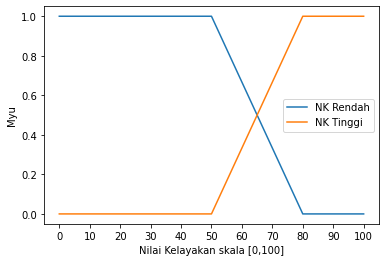

In [6]:
# 12 Aturan Fuzzy
def FuzzyRule(a):
    if a[0][0] == "Kecil" and a[1][0] == "Sedikit": 
        if a[0][1] < a[1][1]:
            return ["Tinggi", a[0][1]]
        else:
            return ["Tinggi", a[1][1]]
    if a[0][0] == "Kecil" and a[1][0] == "Sedang": 
        if a[0][1] < a[1][1]:
            return ["Tinggi", a[0][1]]
        else:
            return ["Tinggi", a[1][1]]
    if a[0][0] == "Kecil" and a[1][0] == "Banyak": 
        if a[0][1] < a[1][1]:
            return ["Tinggi", a[0][1]]
        else:
            return ["Tinggi", a[1][1]]
    if a[0][0] == "Sedang" and a[1][0] == "Sedikit": 
        if a[0][1] < a[1][1]:
            return ["Rendah", a[0][1]]
        else:
            return ["Rendah", a[1][1]]
    if a[0][0] == "Sedang" and a[1][0] == "Sedang": 
        if a[0][1] < a[1][1]:
            return ["Tinggi", a[0][1]]
        else:
            return ["Tinggi", a[1][1]]
    if a[0][0] == "Sedang" and a[1][0] == "Banyak": 
        if a[0][1] < a[1][1]:
            return ["Tinggi", a[0][1]]
        else:
            return ["Tinggi", a[1][1]]
    if a[0][0] == "Besar" and a[1][0] == "Sedikit": 
        if a[0][1] < a[1][1]:
            return ["Rendah", a[0][1]]
        else:
            return ["Rendah", a[1][1]]
    if a[0][0] == "Besar" and a[1][0] == "Sedang": 
        if a[0][1] < a[1][1]:
            return ["Rendah", a[0][1]]
        else:
            return ["Rendah", a[1][1]]
    if a[0][0] == "Besar" and a[1][0] == "Banyak": 
        if a[0][1] < a[1][1]:
            return ["Tinggi", a[0][1]]
        else:
            return ["Tinggi", a[1][1]]
    if a[0][0] == "Sangat Besar" and a[1][0] == "Sedikit": 
        if a[0][1] < a[1][1]:
            return ["Rendah", a[0][1]]
        else:
            return ["Rendah", a[1][1]]
    if a[0][0] == "Sangat Besar" and a[1][0] == "Sedang": 
        if a[0][1] < a[1][1]:
            return ["Rendah", a[0][1]]
        else:
            return ["Rendah", a[1][1]]
    if a[0][0] == "Sangat Besar" and a[1][0] == "Banyak": 
        if a[0][1] < a[1][1]:
            return ["Rendah", a[0][1]]
        else:
            return ["Rendah", a[1][1]]

# Gambar Nilai Kelayakan
x_rendah = [0, 50, 80, 100]
y_rendah = [1, 1, 0, 0]

x_tinggi = [0, 50, 80, 100]
y_tinggi = [0, 0, 1, 1]

xticks = [i*10 for i in range(11)]
fig, ax = plt.subplots()
ax.plot(x_rendah, y_rendah, label='NK Rendah')
ax.plot(x_tinggi, y_tinggi, label='NK Tinggi')
ax.set_xticks(xticks)
ax.set_xlabel('Nilai Kelayakan skala [0,100]')
ax.set_ylabel('Myu')
ax.legend()
plt.show()

In [14]:
# Disjunction
def disjunct(a,b):
    temp = ["Tinggi", 0]
    temp2 = ["Rendah", 0]
    for i in range(len(a)):
        if (a[i][0] == "Rendah"):
            if (a[i][1] > temp2[1]):
                temp2 = ["Rendah", a[i][1]]
        elif (a[i][0] == "Tinggi"):
            if (a[i][1] > temp[1]):
                temp = ["Tinggi", a[i][1]]
    return [b+1,temp,temp2]

# Fuzzification untuk 12 aturan, total data : 12 x 100 = 1200 data
temp = []
Fuzzification = []
for i in range(len(dataID)):
    for j in range(len(FuzzysetPenghasilan[i])):
        for k in range(len(FuzzysetPengeluaran[j])):
            temp = [FuzzysetPenghasilan[i][j],FuzzysetPengeluaran[j][k]]
            Fuzzification.append(temp)

# Penampungan Data Konjungsi
count = 1
temp = []
ConFuzzy = []
for i in range(len(Fuzzification)):    
    temp.append(FuzzyRule(Fuzzification[i]))
    if (count != 12):
        count += 1
    else:
        ConFuzzy.append(temp)
        count = 1
        temp = []

# Penampungan Data Disjungsi
DisFuzzy = []
for i in range(len(ConFuzzy)):
    DisFuzzy.append(disjunct(ConFuzzy[i],i))
    
FuzzysetPenghasilan[0]

[['Kecil', 0], ['Sedang', 0], ['Besar', 0], ['Sangat Besar', 1]]

3


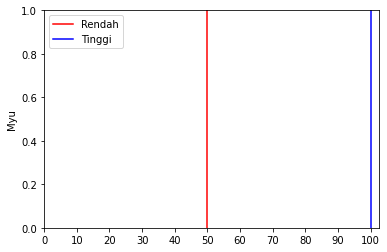

In [15]:
# Defuzzyfication : Sugeno
tinggi = 100
rendah = 50
DeFuzzification = []
list = []

def sugeno(a,b):
    return (a*tinggi + b*rendah)/(a+b)

for i in range(len(DisFuzzy)):
    a = DisFuzzy[i][1][1]
    b = DisFuzzy[i][2][1]
    DeFuzzification.append([i+1, sugeno(a,b)])

print(len(DisFuzzy[0]))
# Sort hasil fuzzy untuk memilih 20 hasil terbaik
DeFuzzification = sorted(DeFuzzification, key=lambda kk: kk[1], reverse = True)
for i in range(20):
    list.append(DeFuzzification[i][0])

# Gambar diagram sugeno
xticks = [i*10 for i in range(11)]
fig, ax = plt.subplots()
ax.axvline(x=50, color='red', label='Rendah')
ax.axvline(x=100, color='blue', label='Tinggi')
ax.set_xticks(xticks)
ax.set_ylabel('Myu')
ax.legend()
plt.show()

In [9]:
# Result to 'Bantuan.xls' (Berisi data ID/nomor baris 1-100 pada file Mahasiswa.xls)
# df = pd.DataFrame(list, columns = ['Mahasiswa ke-'])
# df.to_excel(r'F:\SEMESTER 5\AI\Week 8\Bantuan.xlsx', index = False, header=True)